In [114]:
# !pip install scikit-learn
# !pip install statsmodels

In [115]:
# 必要なパッケージをインポート
import os
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# import japanize_matplotlib
from pathlib import Path
# import tqdm
import random
import itertools
import seaborn as sns

random.seed(7)


In [116]:
# 乱数でデータフレーム作成
def create_df():
    random.seed(7)

    data_num = 3000
    rl2 = ["zero", "one", "two", "three", "four"]
    rl1 = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
    rl3 = ["あ", "い", "う", "え", "お"]

    value1 = random.choices(rl1, k=data_num)
    value2 = random.choices(rl2, k=data_num)
    value3 = random.choices(rl3, k=data_num)
    value4 = [random.randrange(10, 500, 5) for i in range(data_num)]
    value5 = [random.randrange(100, 200, 10) for i in range(data_num)]

    dict_test = dict(user=value1, grade=value2, usage=value3, volume=value4, unit_cost=value5)
    df = pd.DataFrame(data=dict_test)
    return df
df = create_df()
display(df.shape)
display(df.head(5))

(3000, 5)

,user,grade,usage,volume,unit_cost
0,D,one,お,150,170
1,B,one,お,135,110
2,G,zero,い,465,150
3,A,zero,う,280,130
4,F,four,い,385,160


In [117]:
user = "user"
grade = "grade"
usage = "usage"
volume = "volume"
unit_cost = "unit_cost"
sales = "sales"
concat_col = f"{user}_{grade}"

df[concat_col] = df[user] + df[grade]
df[sales] = df[volume] * df[unit_cost]

print(len(df["user_grade"].unique()))
display(df)

50


,user,grade,usage,volume,unit_cost,user_grade,sales
0,D,one,お,150,170,Done,25500
1,B,one,お,135,110,Bone,14850
2,G,zero,い,465,150,Gzero,69750
3,A,zero,う,280,130,Azero,36400
4,F,four,い,385,160,Ffour,61600
...,...,...,...,...,...,...,...
2995,A,zero,い,115,150,Azero,17250
2996,G,four,い,290,130,Gfour,37700
2997,J,three,お,185,160,Jthree,29600
2998,C,one,お,455,180,Cone,81900


In [118]:
grade_li = list(df["grade"].unique()) # 付与したいカテゴリ変数
df_temp = pd.DataFrame()
for grade_nm in grade_li:
    df1 = df[df["grade"] == grade_nm]
    df1_agg = (
        pd.DataFrame(
        pd.DataFrame(df1[["user_grade", "volume", "sales"]].groupby("user_grade").sum()) # 合計をとるカラムを選択
        .rename(columns={"volume":"total_volume",
                         "sales":"total_sales"})
        #.sort_values(by="取引回数", ascending=False)
        #["取引回数"]
        .reset_index()
        )
    )
    df1_agg["grade"] = grade_nm
    df_temp = pd.concat([df_temp, df1_agg], axis=0).reset_index(drop=True)

df_sum = df_temp.copy()
print(df_sum.shape)
display(df_sum.head())

(50, 4)


,user_grade,total_volume,total_sales,grade
0,Aone,16280,2320550,one
1,Bone,15675,2344100,one
2,Cone,22315,3287900,one
3,Done,16775,2620300,one
4,Eone,18605,2541750,one


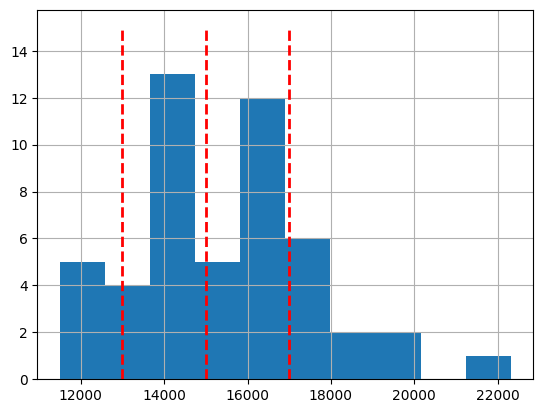

In [119]:
df_sum["total_volume"].hist()

criterion1 = 13000
criterion2 = 15000
criterion3 = 17000
upper = 15
lower = 0
plt.vlines(criterion1, lower, upper, colors='red', linestyle='dashed', linewidth=2)
plt.vlines(criterion2, lower, upper, colors='red', linestyle='dashed', linewidth=2)
plt.vlines(criterion3, lower, upper, colors='red', linestyle='dashed', linewidth=2)

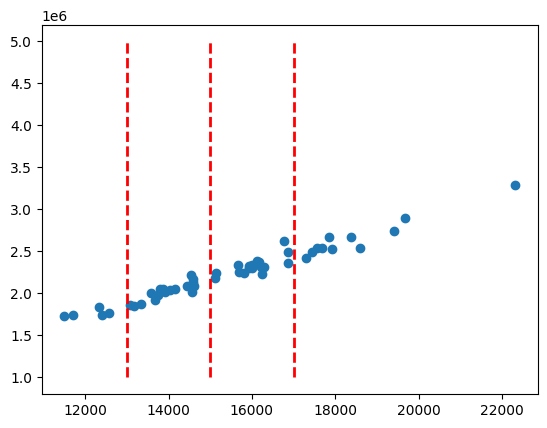

In [120]:
plt.scatter(x=df_sum["total_volume"], y=df_sum["total_sales"])

upper = 5000000
lower = 1000000
plt.vlines(criterion1, lower, upper, colors='red', linestyle='dashed', linewidth=2)
plt.vlines(criterion2, lower, upper, colors='red', linestyle='dashed', linewidth=2)
plt.vlines(criterion3, lower, upper, colors='red', linestyle='dashed', linewidth=2)

In [121]:
# hist_df = df_sum
# fig, ax = plt.subplots()
# sns.histplot(data = hist_df, x = "total_volume", hue = "usage",
#              bins=np.arange(1000, 7000, 500), 
#              kde = True
#              )
# ax.set_title("");

In [122]:
criterion1 = 13000
criterion2 = 15000
criterion3 = 17000

df_temp2 = pd.DataFrame()
grade_li = list(df_sum["grade"].unique())
for grade_nm in grade_li:
    df_sum_sel = df_sum[df_sum["grade"] == grade_nm]
    less4500_cnt = len(df_sum_sel[df_sum_sel["total_volume"] <= criterion1])
    less6000_cnt = len(df_sum_sel[(df_sum_sel["total_volume"] >= criterion1) & (df_sum_sel["total_volume"] <= criterion2)])
    less8000_cnt = len(df_sum_sel[(df_sum_sel["total_volume"] >= criterion2) & (df_sum_sel["total_volume"] <= criterion3)])
    over8000_cnt = len(df_sum_sel[df_sum_sel["total_volume"] >= criterion3])
    sum_cnt = less4500_cnt + less6000_cnt + less8000_cnt + over8000_cnt

    df_sum_sel_cnt = pd.DataFrame({"grade": [grade_nm],
                "criterion1以下":[less4500_cnt],
                "criterion2以下":[less6000_cnt],
                "criterion3以下":[less8000_cnt],
                "criterion3以上":[over8000_cnt],
                "sum_cnt": [sum_cnt]})
    df_temp2 = pd.concat([df_temp2, df_sum_sel_cnt], axis=0).reset_index(drop=True)

df_sum_cnt = df_temp2.copy()
sum_row = df_sum_cnt.iloc[:, 1:].sum()# 各列の合計を計算
sum_li = sum_row.tolist()
sum_li.insert(0, 0)
df_sum_cnt.loc["total_cnt"] = sum_li
df_sum_cnt.loc["total_cnt", "grade"] = "total_cnt"
cnt_df = df_sum_cnt.reset_index(drop=True)
cnt_df.sort_values(by="sum_cnt", ascending=False)

,grade,criterion1以下,criterion2以下,criterion3以下,criterion3以上,sum_cnt
5,total_cnt,5,17,17,11,50
0,one,1,2,5,2,10
1,zero,0,5,2,3,10
2,four,1,3,4,2,10
3,three,2,3,3,2,10
4,two,1,4,3,2,10


In [123]:
cnt_ratio_df = cnt_df.copy()
cnt_ratio_df["criterion1以下"] = round(cnt_ratio_df["criterion1以下"] / cnt_ratio_df["sum_cnt"] * 100)
cnt_ratio_df["criterion2以下"] = round(cnt_ratio_df["criterion2以下"] / cnt_ratio_df["sum_cnt"] * 100)
cnt_ratio_df["criterion3以下"] = round(cnt_ratio_df["criterion3以下"] / cnt_ratio_df["sum_cnt"] * 100)
cnt_ratio_df["criterion3以上"] = round(cnt_ratio_df["criterion3以上"] / cnt_ratio_df["sum_cnt"] * 100)

cnt_ratio_df

,grade,criterion1以下,criterion2以下,criterion3以下,criterion3以上,sum_cnt
0,one,10.0,20.0,50.0,20.0,10
1,zero,0.0,50.0,20.0,30.0,10
2,four,10.0,30.0,40.0,20.0,10
3,three,20.0,30.0,30.0,20.0,10
4,two,10.0,40.0,30.0,20.0,10
5,total_cnt,10.0,34.0,34.0,22.0,50


In [124]:
criterion1 = 13000
criterion2 = 15000
criterion3 = 17000

df_temp2 = pd.DataFrame()
grade_li = list(df_sum["grade"].unique())
for grade_nm in grade_li:
    df_sum_sel = df_sum[df_sum["grade"] == grade_nm]
    less4500_sales = df_sum_sel[df_sum_sel["total_volume"] <= criterion1]["total_sales"].sum()
    less6000_sales = df_sum_sel[(df_sum_sel["total_volume"] >= criterion1) & (df_sum_sel["total_volume"] <= criterion2)]["total_sales"].sum()
    less8000_sales = df_sum_sel[(df_sum_sel["total_volume"] >= criterion2) & (df_sum_sel["total_volume"] <= criterion3)]["total_sales"].sum()
    over8000_sales = df_sum_sel[df_sum_sel["total_volume"] >= criterion3]["total_sales"].sum()
    sum_sales = less4500_sales + less6000_sales + less8000_sales + over8000_sales

    df_sum_sel_sales = pd.DataFrame({"grade": [grade_nm],
                "criterion1以下":[less4500_sales],
                "criterion2以下":[less6000_sales],
                "criterion3以下":[less8000_sales],
                "criterion3以上":[over8000_sales],
                "sum_sales": [sum_sales]})
    df_temp2 = pd.concat([df_temp2, df_sum_sel_sales], axis=0).reset_index(drop=True)

df_sum_sales = df_temp2.copy()
sum_row = df_sum_sales.iloc[:, 1:].sum()# 各列の合計を計算
sum_li = sum_row.tolist()
sum_li.insert(0, 0)
df_sum_sales.loc["total_sales"] = sum_li
df_sum_sales.loc["total_sales", "grade"] = "total_sales"
sales_df = df_sum_sales.reset_index(drop=True)
sales_df.sort_values(by="sum_sales", ascending=False).set_index(keys="grade").style.format("{:,d}")

,criterion1以下,criterion2以下,criterion3以下,criterion3以上,sum_sales
grade,,,,,
total_sales,"8,828,850","34,438,950","39,639,200","29,341,600","112,248,600"
one,"1,763,600","4,149,650","11,775,300","5,829,650","23,518,200"
zero,0,"10,038,900","4,561,100","8,171,850","22,771,850"
four,"1,745,750","6,006,950","9,300,750","5,212,400","22,265,850"
two,"1,728,650","8,092,050","7,023,800","5,091,450","21,935,950"
three,"3,590,850","6,151,400","6,978,250","5,036,250","21,756,750"


In [126]:
sales_ratio_df = sales_df.copy()
sales_ratio_df["criterion1以下"] = round(sales_ratio_df["criterion1以下"] / sales_ratio_df["sum_sales"] * 100)
sales_ratio_df["criterion2以下"] = round(sales_ratio_df["criterion2以下"] / sales_ratio_df["sum_sales"] * 100)
sales_ratio_df["criterion3以下"] = round(sales_ratio_df["criterion3以下"] / sales_ratio_df["sum_sales"] * 100)
sales_ratio_df["criterion3以上"] = round(sales_ratio_df["criterion3以上"] / sales_ratio_df["sum_sales"] * 100)

sales_ratio_df = sales_ratio_df.sort_values(by="sum_sales", ascending=False)

# 3桁区切りにする関数を定義
def format_with_commas(number):
    return '{:,}'.format(number)
sales_ratio_df["sum_sales"] = sales_ratio_df["sum_sales"].apply(format_with_commas)

sales_ratio_df

,grade,criterion1以下,criterion2以下,criterion3以下,criterion3以上,sum_sales
5,total_sales,8.0,31.0,35.0,26.0,"112,248,600"
0,one,7.0,18.0,50.0,25.0,"23,518,200"
1,zero,0.0,44.0,20.0,36.0,"22,771,850"
2,four,8.0,27.0,42.0,23.0,"22,265,850"
4,two,8.0,37.0,32.0,23.0,"21,935,950"
3,three,17.0,28.0,32.0,23.0,"21,756,750"
